# Table of Contents
- 1. Brief Introduction on Text Representation
- 2. Why Feature Extraction from text is difficult?
- 3. Common Terms you should know
- 4. Techniques for Feature Extraction from text data
    - One-Hot Encoding
    - Bag of words Technique
    - N-Grams
    - TF-IDF


#  Introduction to Text Representation
The first question arises is what is Feature Extraction from the text?  Feature Extraction is a general term that is also known as a text representation of text vectorization which is a process of converting text into numbers. we call vectorization because when text is converted in numbers it is in vector form.

Now the second question would be Why do we need feature extraction? So we know that machines can only understand numbers and to make machines able to identify language we need to convert it into numeric form.

#  Why Feature extraction from textual data is difficult? 
If you ask any NLP practitioner or experienced data scientist then the answer will be yes that handling textual data is difficult? Now first let us compare text feature extraction with feature extraction in other types of data. So In an image dataset suppose digit recognition is where you have images of digits and the task is to predict the digit so in this image feature extraction is easy because images are already present in form of numbers(Pixels). If we talk about audio features, suppose emotion prediction from speech recognition so in this we have data in form of waveform signals where features can be extracted over some time Interval. But when I say I have a sentence and want to predict its sentiment How will you represent it in numbers? An image dataset, the speech dataset was the simple case but in a text data case, you have to think a little bit. In this article, we are going to study these techniques only.



#  Common Terms Used
These are common terms that we will use in further techniques so I want you to be familiar with these four basic terms
- Corpus(C) ~ The `total number of combinations of words in the whole dataset is known as Corpus`. In simple words concatenating all the text records of the dataset forms a corpus.
- Vocabulary(V) ~ a `total number of distinct(Unique) words which form your corpus` is known as Vocabulary.
- Document(D) ~ There are `multiple records in a dataset` so a single record or review is referred to as a document.
- Word(W) ~ Words that are `used in a document are known as Word`.

# Techniques for Feature Extraction

# 1. One-Hot Encoding

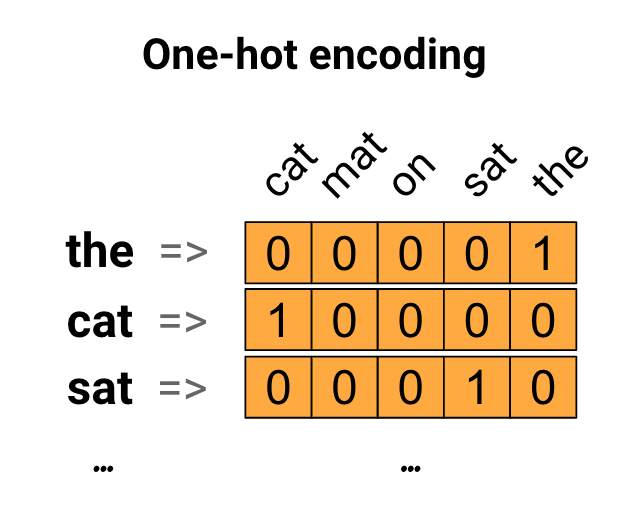!

One hot encoding means converting words of your document in a V-dimension vector and by combining all this we get a single document so at the end we have a two-dimensional array. This technique is very intuitive means it is simple and you can code it yourself. This is only the advantage of One-Hot Encoding.

**Disadvantages**

1) Sparsity – You can see that only a single sentence creates a vector of n*m size where n is the length of sentence m is a number of unique words in a document and 80 percent of values in a vector is zero.

2) No fixed Size – Each document is of a different length which creates vectors of different sizes and cannot feed to the model.

3) Does not capture semantics – The core idea is we have to convert text into numbers by keeping in mind that the actual meaning of a sentence should be observed in numbers that are not seen in one-hot encoding.


# 2 Bag Of Words
It is one of the most used text vectorization techniques. It is mostly used in text classification tasks. Bag of words is a little bit similar to one-hot encoding where we enter each word as a binary value and in a Bag of words we keep a single row and entry the count of words in a document. So we create a vocabulary and for a single document, we enter one entry of which words occur how many times in a document. Let us get to IDE and implement Bag-of words model using the Count vectorized class of sciket-learn.

In [10]:
import pandas as pd , numpy as np 


In [11]:
# create DataFramer 
df = pd.DataFrame({'Text':['people watch campusx','campusx watch campusx','people write comments','campusx write comments'],
                   'Output':[1,1,0,0]
                  })

df

,Text,Output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comments,0
3,campusx write comments,0


In [12]:
# bag of words(BOW)
from sklearn.feature_extraction.text import CountVectorizer

# create object 

cv = CountVectorizer()

# fit the model 

bow = cv.fit_transform(df['Text'])


In [13]:
# vocabarary
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comments': 1}


In [14]:
print(bow[0])

  (0, 2)	1
  (0, 3)	1
  (0, 0)	1


In [15]:
# doc 1 
print('people watch campusx')
print('countvectorization')
print(bow[0].toarray())

people watch campusx
countvectorization
[[1 0 1 1 0]]


In [16]:
# doc 2
print(bow[1].toarray())

[[2 0 0 1 0]]


**Advantages**

1) Simple and intuitive – Only a few lines of code are required to implement the technique.

2) Fix size vector – The problem which we saw in one-hot encoding where we are unable to feed data the data to machine learning model because each sentence forms a different size vector but here It ignores the new words and takes only words which are vocabulary so creates a vector of fix size.

**Disadvantages**

1) Out of vocabulary situation – It keeps count of vocabulary words so if new words come in a sentence it simply ignores it and tracks the count of the words that are in vocabulary. But what if the words it ignores are important in predicting the outcome so this is a disadvantage, only benefit is it does not throw an error.

2) Sparsity – when we have a large vocabulary, and the document contains a few repeated terms then it creates a sparse array.

3) Not considering ordering is an issue – It is difficult to estimate the semantics of the document.

# 3 N-Grams
The technique is similar to Bag of words. All the techniques till now we have read it is made up of a single word and we are not able to use them or utilize them for better understanding. So N-Gram technique solves this problem and constructs vocabulary with multiple words. When we built an N-gram technique we need to define like we want bigram, trigram, etc. So when you define N-gram and if it is not possible then it will throw an error. In our case, we cannot build after a 4 or 5-gram model. Let us try bigram and observe the outputs.

In [17]:
# create DataFramer 
df = pd.DataFrame({'Text':['people watch campusx','campusx watch campusx','people write comments','campusx write comments'],
                   'Output':[1,1,0,0]
                  })

df

,Text,Output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comments,0
3,campusx write comments,0


In [ ]:
help(CountVectorizer())

ngram_range`` of ``(1, 1)`` means only unigrams, `

`(1, 2)`` means unigrams and bigrams, and 

``(2, 2)`` means only bigrams.
      

In [29]:
# bag of words(BOW)
from sklearn.feature_extraction.text import CountVectorizer

# create object 

cv = CountVectorizer(ngram_range=(2,2))  # default (1,1) -> unigram

# fit the model 

bow = cv.fit_transform(df['Text'])

In [30]:
# vocabarary
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comments': 5, 'campusx write': 1}


In [31]:
# doc 1 
print('people watch campusx')
print('countvectorization')
print(bow[0].toarray())

people watch campusx
countvectorization
[[0 0 1 0 1 0]]


**Advantages**

1) Able to capture semantic meaning of the sentence – As we use Bigram or trigram then it takes a sequence of sentences which makes it easy for finding the word relationship.

2) Intuitive and easy to implement – implementation of N-Gram is straightforward with a little bit of modification in Bag of words.

**Disadvantages**

1) As we move from unigram to N-Gram then dimension of vector formation or vocabulary increases due to which it takes a little bit more time in computation and prediction

2) no solution for out of vocabulary terms – we do not have a way another than ignoring the new words in a new sentence.

# 4 TF-IDF (Term Frequency and Inverse Document Frequency)
Now the technique which we will study does not work in the same way as the above techniques. This technique gives different values(weightage) to each word in a document. The core idea of assigning weightage is the word that appears multiple time in a document but has a rare appearance in corpus then it is very important for that document so it gives more weightage to that word. This weightage is calculated by two terms known as TF and IDF. So for finding the weightage of any word we find TF and IDF and multiply both the terms.

**Term Frequency(TF)** – The number of occurrences of a word in a document divided by a total number of terms in a document is referred to as Term Frequency. For example, I have to find the Term frequency of people in the below sentence then it will be 1/5. It says how frequently a particular word occurs in a particular document.

**Inverse Document Frequency** – Total number of documents in corpus divided by the total number of documents with term T in them and taking the log of a complete fraction is inverse document frequency. If we have a word that comes in all documents then the resultant output of the log is zero But in implementation sklearn uses a little bit different implementation because if it becomes zero then the contribution of the word is ignored so they add one in the resultant and because of which you can observe the values of TFIDF a bit high. If a word comes only a single time then IDF will be higher.

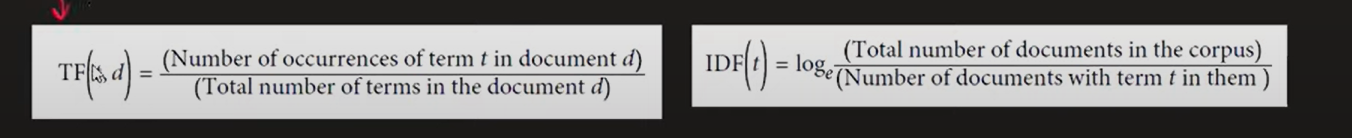

In [32]:
df

,Text,Output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comments,0
3,campusx write comments,0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf.fit_transform(df['Text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [15]:
tfidf.idf_

array([1.22314355, 1.51082562, 1.51082562, 1.51082562, 1.51082562])

In [16]:
tfidf.get_feature_names_out()

array(['campusx', 'comments', 'people', 'watch', 'write'], dtype=object)